# **Lab 18: Deep Learning with CNNs**
---

### **Description**
In today's lab you'll work with different demonstrations of deep learning applications in both image classification and text generation.

<br>

### **Structure**

**Part 1**: [Chihuahua or Muffin?](#p1)

**Part 2**: [Text Generation with GPT2](#p2)

**Part 3**: [Image Generation with Stable Diffusion](#p3)






<br>


### **Learning Objectives**
By the end of this lab, you will be able to:
* Recognize image classification as a computer vision task.
* Recognize text generation as a natural language processing task.

<br>



<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [1]:
!pip install --quiet gdown==4.5.4 --no-cache-dir
import os
import random
from PIL import Image as PILImage
from IPython.display import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from math import floor

import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras import backend as K
from keras.optimizers import *
from keras.applications.vgg16 import VGG16
from keras.metrics import *
from keras.applications.vgg16 import preprocess_input

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation


<a name="p1"></a>

---
## **Part 1: Chihuahua or Muffin?**
---

**Chihuahua or Muffin?** This is a classic example in Computer Vision where you can use a deep learning model to differentiate a blueberry muffin from a chihuahua.


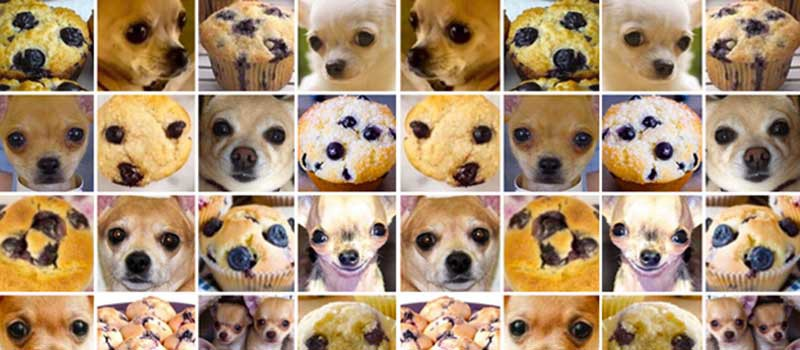



In this section, you will follow the steps above to build, train, and evaluate a DNN model for binary image classification.

####**Problem 1.1:**

Run the code below to load the data.

In [2]:
!gdown 1-LmbZqBxEFMp3KZc7X1YobqolXAExZc0
!unzip -qq chihuahua_or_muffin.zip
# Select the directory where the data is saved
data_dir = 'chihuahua_or_muffin/'

# Set the path to the directory where your data is stored
train_directory = os.path.join(data_dir, 'train')
validation_directory = os.path.join(data_dir, 'validation')

# Setting the data directories for each class in the train set
train_chihuahua_dir = os.path.join(data_dir, 'train/chihuahua')
train_muffin_dir = os.path.join(data_dir, 'train/muffin')

# Setting the data directories for each class in the train set
validation_chihuahua_dir = os.path.join(data_dir, 'validation/chihuahua')
validation_muffin_dir = os.path.join(data_dir, 'validation/muffin')

Downloading...
From: https://drive.google.com/uc?id=1-LmbZqBxEFMp3KZc7X1YobqolXAExZc0
To: /content/chihuahua_or_muffin.zip
100% 512M/512M [00:08<00:00, 57.7MB/s]


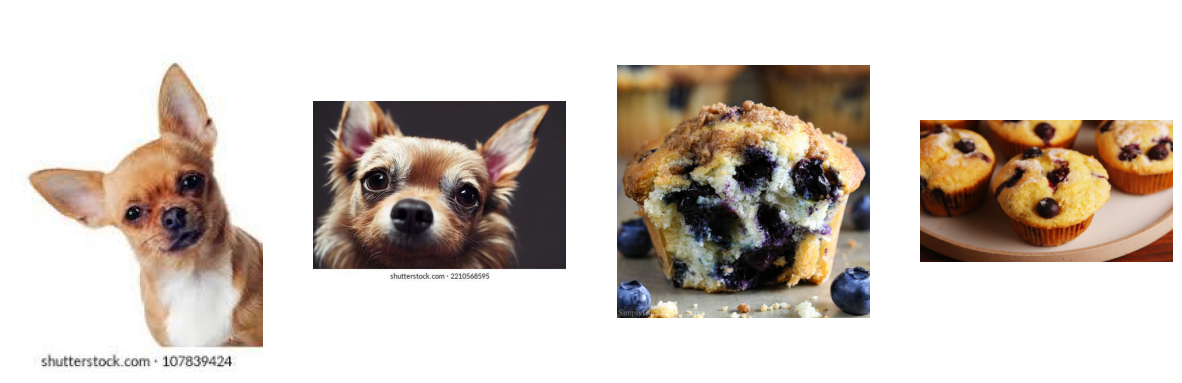

In [ ]:
#@title Plot some of the training data {display-mode: "form"}

# Plotting examples of training data
# Plotting examples from our image data
_, ax = plt.subplots(1, 4, figsize=(15,60))  # to show 4 images side by side, make a "1 row x 4 column" axes
ax[0].imshow(plt.imread(os.path.join(train_chihuahua_dir, "img_0_449.jpg")))  # show the chihuahua in the first column
ax[0].axis('off')
ax[1].imshow(plt.imread(os.path.join(train_chihuahua_dir, "img_0_439.jpg")))  # show the chihuahua in the second column
ax[1].axis('off')
ax[2].imshow(plt.imread(os.path.join(train_muffin_dir, "img_0_39.jpg")))  # show the muffin in the third column
ax[2].axis('off')
ax[3].imshow(plt.imread(os.path.join(train_muffin_dir, "img_0_44.jpg")))  # show the muffin in the fourth column
ax[3].axis('off')

plt.show()



*This code is provided for you. Just run the cells below.*

In [3]:
# Load the training data using the ImageDataGenerator class
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load the validation data using the ImageDataGenerator class
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_directory,
    target_size=(150, 150),
    batch_size=32,
    shuffle = False,
    class_mode='binary'
)

# Define the input shape for the model
input_shape = (150, 150, 3)

# Initialize the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

# Add a max pooling layer
model.add(MaxPooling2D((2, 2)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(MaxPooling2D((2, 2)))

# Add the third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten image and add input layer
model.add(Flatten(input_shape = input_shape))

# Add a fully connected layer
model.add(Dense(512, activation='relu'))

# Add a fully connected layer
model.add(Dense(512, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
opt = Adam(learning_rate = 0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model using the generator
history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=20
)
# NOTE: Please be patient. Training may take a couple of minutes to run with these parameters.

Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.
Epoch 1/5
10/10 [==============================] - 31s 3s/step - loss: 14.6145 - accuracy: 0.5688 - val_loss: 0.5936 - val_accuracy: 0.9859
Epoch 2/5
10/10 [==============================] - 38s 4s/step - loss: 0.7015 - accuracy: 0.5094 - val_loss: 0.6014 - val_accuracy: 1.0000
Epoch 3/5
10/10 [==============================] - 38s 4s/step - loss: 0.6901 - accuracy: 0.5375 - val_loss: 0.6474 - val_accuracy: 1.0000
Epoch 4/5
10/10 [==============================] - 29s 3s/step - loss: 0.6892 - accuracy: 0.5562 - val_loss: 0.6300 - val_accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 39s 4s/step - loss: 0.6871 - accuracy: 0.5594 - val_loss: 0.5833 - val_accuracy: 1.0000


In [4]:
# Reset indices in generator
validation_generator.reset()

# Predict the class probabilities for the validation data
pred_probs = model.predict(validation_generator)

37/37 [==============================] - 21s 565ms/step


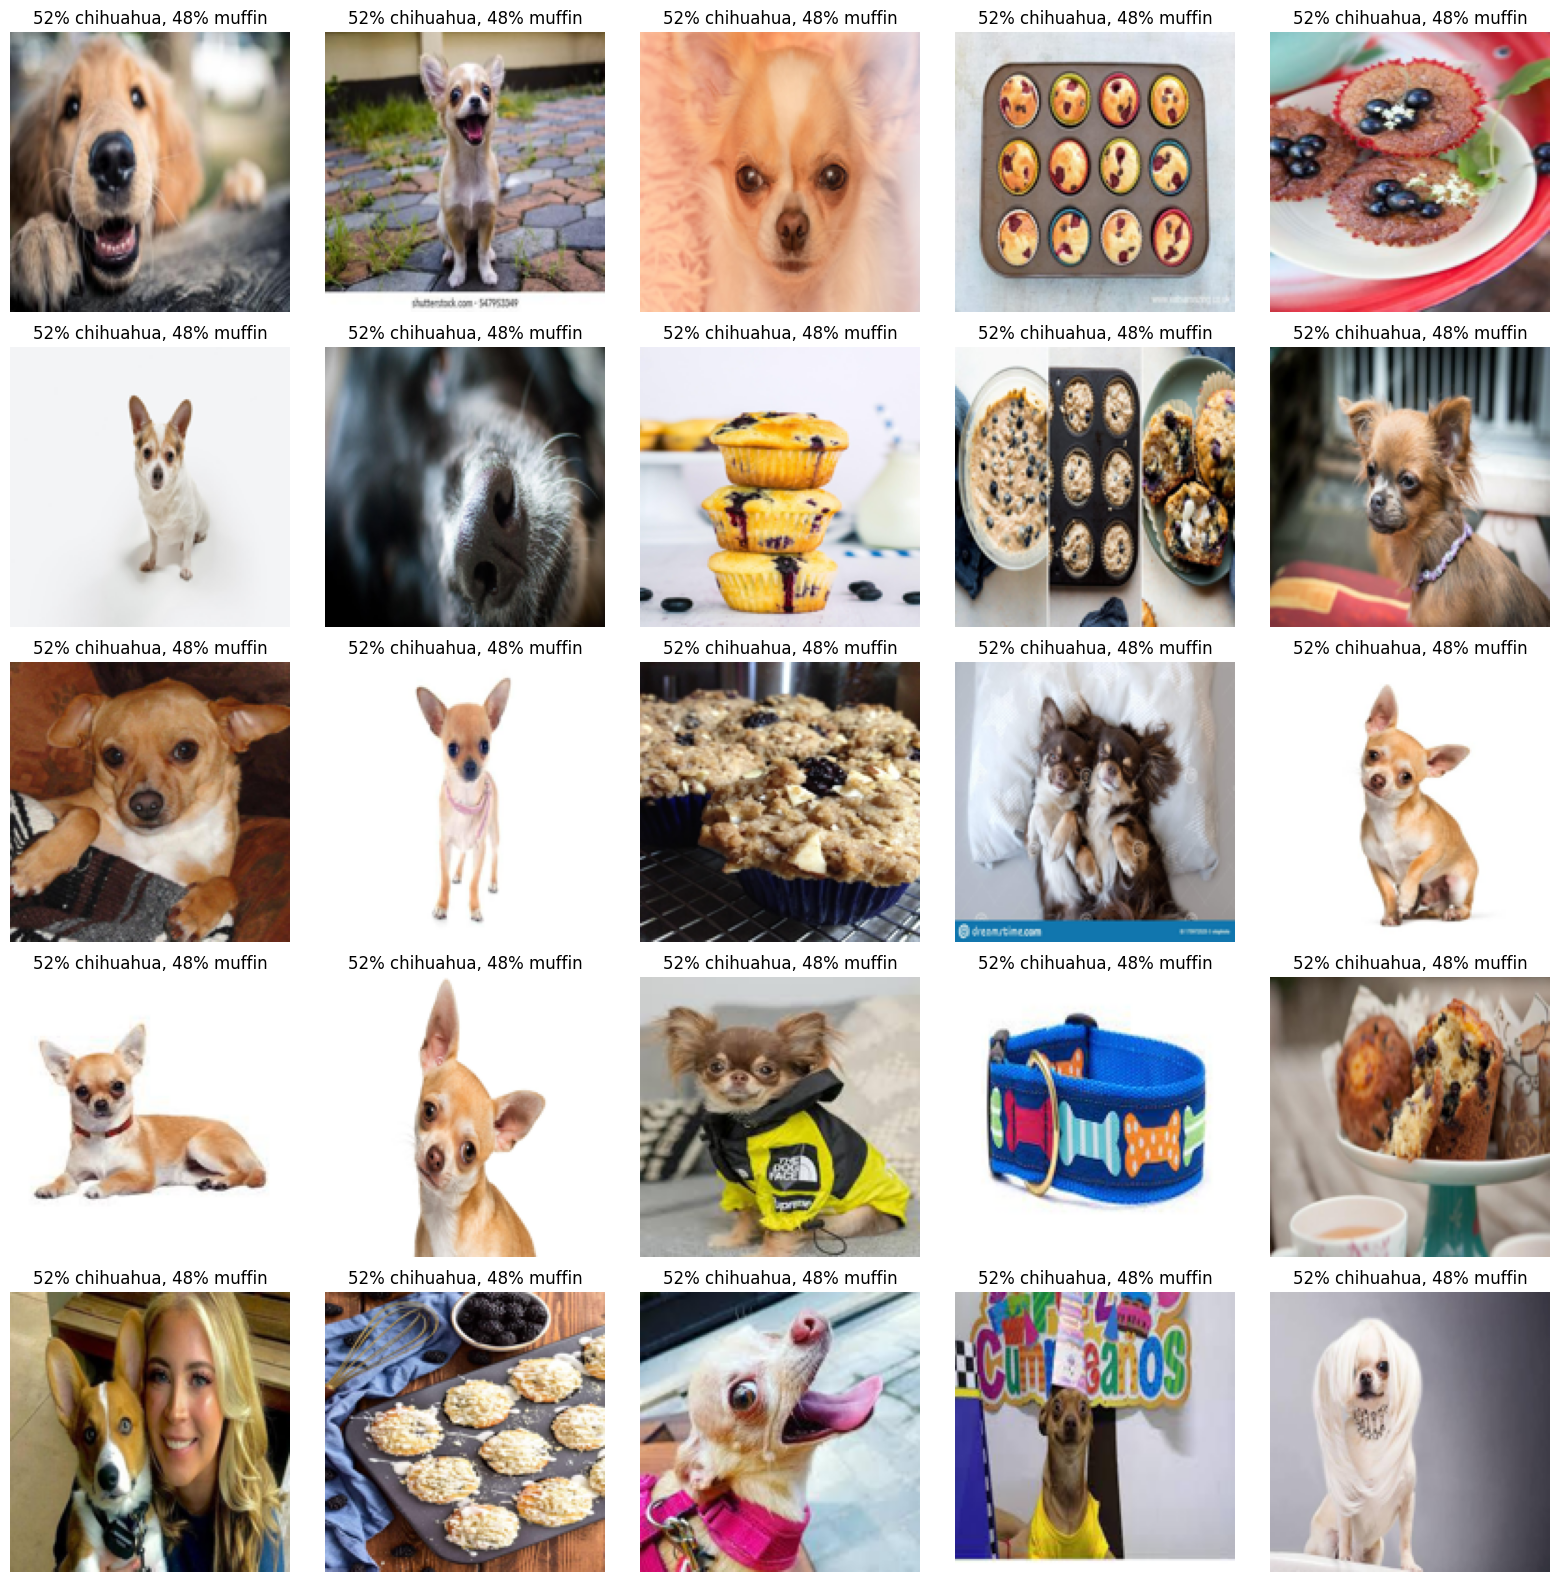

In [ ]:
#@title Visualize the result by examining a sample of the predictions. {display-mode: "form"}


# Create grid for images
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 2x2 grid of axes
                 axes_pad=0.35,  # pad between axes in inch.
                 )

validation_generator.reset()
for ax, i in zip(grid, random.sample(range(0, 1000), 25)):
    img = PILImage.open(os.path.join(validation_directory,validation_generator.filenames[i]))
    img = img.resize((150,150))
    ax.imshow(img)
    ax.axis("off")
    ax.set_title("{:.0f}% chihuahua, {:.0f}% muffin".format(100*(1-pred_probs[i][0]), 100*pred_probs[i][0], fontsize=15))

plt.show()

<a name="p2"></a>

---
## **Part 2: Text Generation with GPT2**
---

In this section, we give an example of how to use a very famous pretrained model for Natural Language Processing - GPT. Specifically, we use this to generate text based on a prompt.

### **Install `keras-nlp`**

In [ ]:
!pip install keras-nlp --quiet

### **Import all necessary libraries and functions**

In [ ]:
import keras_nlp
from keras_nlp.models import GPT2CausalLMPreprocessor, GPT2CausalLM
from keras.optimizers import *
from keras.losses import SparseCategoricalCrossentropy

import tensorflow_datasets.public_api as tfds
import tensorflow as tf

Using TensorFlow backend


### **Load the GPT2 Model**

In [ ]:
preprocessor = GPT2CausalLMPreprocessor.from_preset(
    "gpt2_base_en",
    sequence_length=128,
)


gpt2_lm = GPT2CausalLM.from_preset(
    "gpt2_base_en", preprocessor=preprocessor
)

### **Transfer Learning: Shakespearean Text**

Let's transfer the general knowledge of GPT2 to specifically generate Shakespearean style text.

In [ ]:
d = tfds.load(name='tiny_shakespeare')['train']

training_text = ""
for x in d:
  training_text = str(x['text'].numpy())[1:]

import re

training_text = re.sub('[\';,\"]', '', training_text)
training_text = training_text.split('\\n')

# Remove all speakers (ex: All:)
# and remove all blank lines
new_texts = []
tmp = ""
for text in training_text:
  if not ':' in text and len(text) > 0: tmp += text + ". "
  elif tmp != "":
    new_texts.append(tmp)
    tmp = ""

training_text = new_texts

preprocessor = GPT2CausalLMPreprocessor.from_preset(
    "gpt2_base_en",
    sequence_length=128,
)

gpt2_lm_shakespeare = GPT2CausalLM.from_preset(
    "gpt2_base_en", preprocessor=preprocessor
)

# We can just use a number like 0.01,
# but this learning rate changes over time.
# This has been shown to increase performance
# in many cases.
learning_rate = schedules.PolynomialDecay(
    5e-5,
    decay_steps=100,
    end_learning_rate=0.0,
)

gpt2_lm_shakespeare.compile(
    optimizer=Adam(learning_rate),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    weighted_metrics=["accuracy"],
)

gpt2_lm_shakespeare.fit(training_text[:1500], epochs = 3)

Epoch 1/3
47/47 [==============================] - 3405s 70s/step - loss: 0.9355 - accuracy: 0.2030
Epoch 2/3
14/47 [=======>......................] - ETA: 37:53 - loss: 0.8602 - accuracy: 0.2478

#### **NOW IT'S YOUR TURN! Generate a Play!**



In [ ]:
num_lines = 10

# Generate the 0th line
line = gpt2_lm_shakespeare.generate("Machine Learning is")
print('Line 0: ' + line)

for i in range(num_lines):

  # Get the last sentence of the previous line
  sentences = re.split('[.?!] ', line)
  if sentences[-1] == '': last_sentence = sentences[-1]
  else: last_sentence = sentences[-2]

  # Generate the next line
  line = gpt2_lm_shakespeare.generate(last_sentence)
  print('Line ' + str(i + 1) + ': ' + re.sub(last_sentence, '', line))

Line 0: Machine Learning is not to be used as an excuse to give up all our rights.. 
Line 1: The gods are not to judge you.. 
Line 2: The gods are not gods. The gods do not speak but speak of. Their mouths. And their mouths do not speak but speak. Of what their mouths speak. 
Line 3: The Lord will give you. Your prayers. Your prayers. Your prayers.. 
Line 4: You have been so kind of you. Your love for your country is so strong. I have never seen a more loving country. 
Line 5: I have heard you speak of it. 
Line 6: I have no other purpose than to tell you. What you say. That I shall not. Be the first. To speak to you. That you may have a more noble purpose than to. Say. That you have the right to say that you do. Have the right to. Say you have the right to. Say you do. Have the right to say you are a man worthy of the name. Of the city. And the people.. 
Line 7: The gods of the world are not so strong as they think. That if he did so, he would not. That he should have the senate. That

<a name="p3"></a>

---
## **Part 3: Image Generation with Stable Diffusion**
---

In this section, we given an example of how to use a very famous pretrained model for Computer Vision - Stable Diffusion. Specifically, we will use this to generate images based on a prompt.

### **Install `keras-cv`**

In [ ]:
!pip install keras-cv tensorflow keras-core --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.2/756.2 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 751.8/751.8 kB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 46.5 MB/s eta 0:00:00


### **Import all necessary libraries and functions**

In [ ]:
import keras
import keras_cv
from keras_cv.models import StableDiffusion

import matplotlib.pyplot as plt

Using TensorFlow backend


### **Load the Stable Diffusion Model**

In [ ]:
model = StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


### **Generate Images**

Since the model is pretrained, we can use it "right out of the box". The cells below demonstrates how to generate text based on the prompts `'photograph of an astronaut riding a horse'` (a classic) and `'high school students learning machine learning'`. Feel free to change the prompts!

198180272/198180272 [==============================] - 1s 0us/step


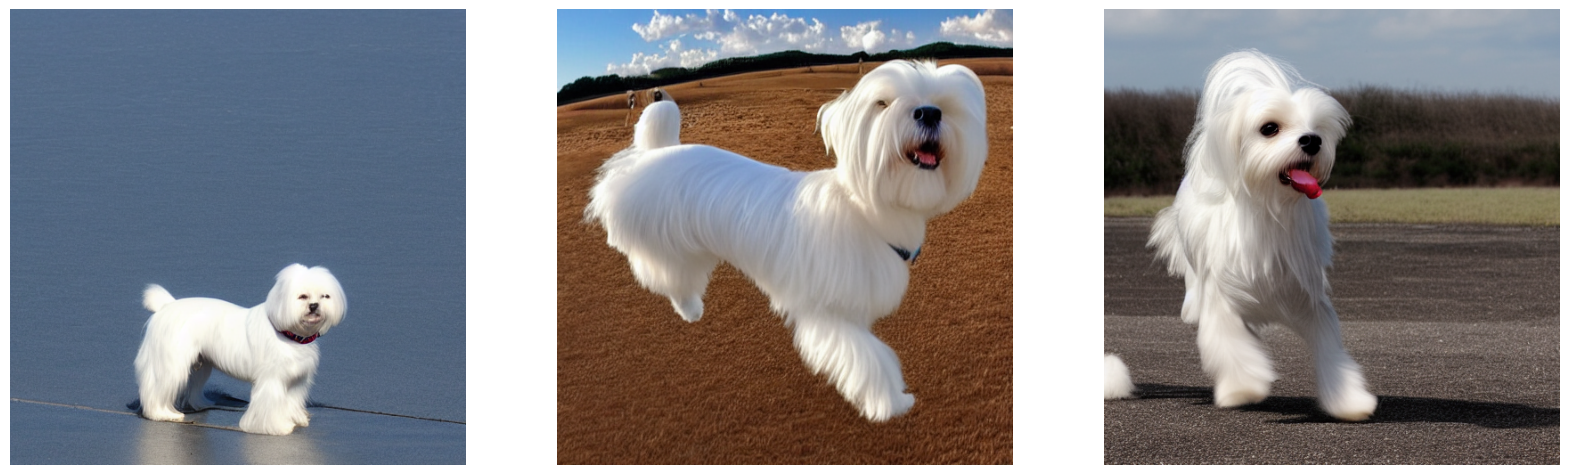

In [ ]:
images = model.text_to_image("white maltese dog on skies", batch_size=3)


def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

50/50 [==============================] - 76s 1s/step


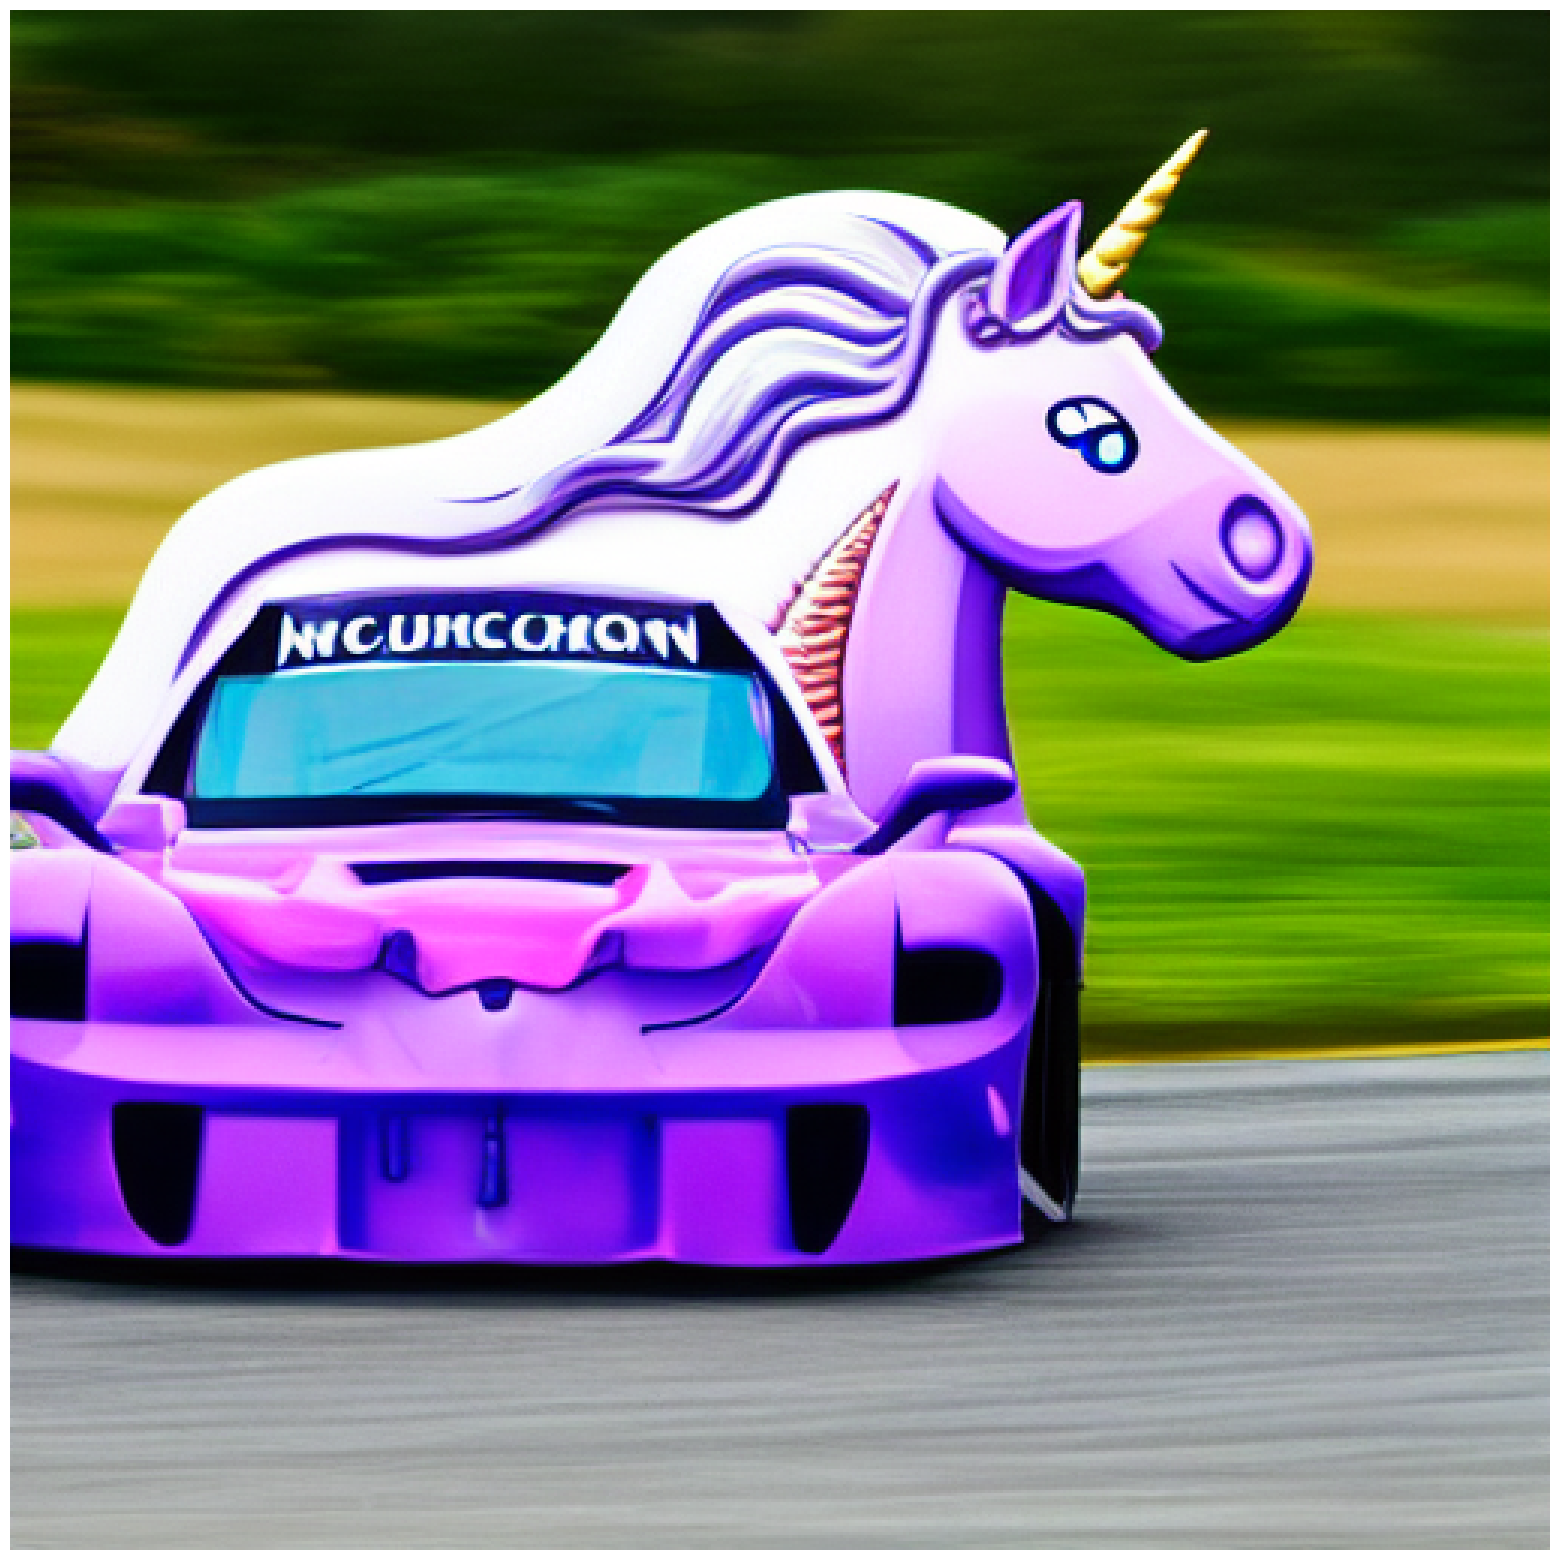

In [ ]:
images = model.text_to_image("unicorn driving a racecar", batch_size=1)


def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)